In [139]:
%pylab inline
import numpy as np
import pandas as pd
!conda install psycopg2 -y
from sqlalchemy import create_engine
import seaborn as sns
import statsmodels.api as sm

mountains = pd.read_csv('Mountains.csv')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Fetching package metadata .......
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at //anaconda:
#
psycopg2                  2.6.2                    py35_0  


# Data Description

Rank: Position in the rank of highest mountains in the world. (Integer)

Mountain: Name or names of the mountain. (Text separated by slashes)

Height (m): Height in meters of the mountain. (Integer)

Height (ft): Height in feet of the mountain. (Integer)

Prominence (m): (Topographic prominence)[https://en.wikipedia.org/wiki/Topographic_prominence] of the mountain in meters. (Integer)

Range: What mountain range does this mountain belong to. (Text)

Coordinates: Coordenates of the highest point. (Text in (WGS84)[https://en.wikipedia.org/wiki/World_Geodetic_System] format)

Parent mountain: (Line parent)[https://en.wikipedia.org/wiki/Line_parent] of the mountain. (Text)

First ascent: Year of first ascent. (Year-formatted Integer)

Ascents bef. 2004: Number of successful ascents before 2004. (Integer)

Failed attempts bef. 2004: Number of unsuccessful ascents before 2004. (Integer)

## Editing and Adjusting the column names

In [140]:
new_names = []
for col in mountains.columns:
    new_names.append(col.replace('.', '', len(col)).replace('(m)', '', len(col)).replace(' ', '', len(col)).lower())

mountains.columns = new_names



## Preprocessing

In [141]:
mountains["parentmountain"]=mountains["parentmountain"].replace(np.nan,"Mount Everest")
mountains["ascentsbef2004"]=mountains["ascentsbef2004"].str.replace(">>145","145")
mountains["ascentsbef2004"]=mountains["ascentsbef2004"].str.replace("Many","15")
mountains["ascentsbef2004"]=mountains["ascentsbef2004"].replace(np.nan,10)

print("mean: " ,mountains["ascentsbef2004"].astype(int).mean())



mean:  10.254237288135593


In [142]:
mountains["ascentsbef2004"] = mountains["ascentsbef2004"].astype(int)
mountains.isnull().sum()
aprox = mountains.failedattemptsbef2004.isnull().mean()
mountains["failedattemptsbef2004"] = mountains.failedattemptsbef2004.replace(np.nan,aprox)
mountains["firstascent"]=mountains.firstascent.str.replace("unclimbed","0")
mount = mountains

In [143]:
mount["firstascent"]=mount.firstascent.astype(int)

### Load the data into SQL

First we'll need to create a database, then create a table in our new database.

In [144]:
engine = create_engine('sqlite:///mount.db')
conn = engine.connect()
mount.to_sql('mount', conn)
!pip install ipython-sql
%load_ext sql

%sql sqlite:///mount.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: None@mount.db'

In [145]:
%sql SELECT name FROM sqlite_master WHERE type = "table"


Done.


name
mount


In [146]:
%sql SELECT  * FROM mount


Done.


index,rank,mountain,height,height(ft),prominence,range,coordinates,parentmountain,firstascent,ascentsbef2004,failedattemptsbef2004
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,Mount Everest,1953,145,121.0
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0
2,3,Kangchenjunga,8586,28169,3922,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0
3,4,Lhotse,8516,27940,610,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26.0
4,5,Makalu,8485,27838,2386,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52.0
5,6,Cho Oyu,8188,26864,2340,Mahalangur Himalaya,28°05′39″N 86°39′39″E﻿,Mount Everest,1954,79,28.0
6,7,Dhaulagiri I,8167,26795,3357,Dhaulagiri Himalaya,28°41′48″N 83°29′35″E﻿,K2,1960,51,39.0
7,8,Manaslu,8163,26781,3092,Manaslu Himalaya,28°33′00″N 84°33′35″E﻿,Cho Oyu,1956,49,45.0
8,9,Nanga Parbat,8126,26660,4608,Nanga Parbat Himalaya,35°14′14″N 74°35′21″E﻿,Dhaulagiri,1953,52,67.0
9,10,Annapurna I,8091,26545,2984,Annapurna Himalaya,28°35′44″N 83°49′13″E﻿,Cho Oyu,1950,36,47.0


# SQL

## 1: Mountain with maximum height

In [147]:
%sql SELECT * FROM mount WHERE height IS (SELECT MAX(height) FROM mount)

Done.


index,rank,mountain,height,height(ft),prominence,range,coordinates,parentmountain,firstascent,ascentsbef2004,failedattemptsbef2004
0,1,Mount Everest / Sagarmatha / Chomolungma,8848,29029,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,Mount Everest,1953,145,121.0


## 2: Number of mountains that belong to Mount Everest

In [148]:
%sql SELECT count(*) FROM mount WHERE parentmountain IS "Mount Everest"

Done.


count(*)
10


# EDA

##  Percentage of ascents and failed ascents to mountains that belong to Mount Everest only:

In [149]:
total_ascents = mount.ascentsbef2004.sum()
total_ascents_failed = mount.failedattemptsbef2004.sum()

mount_everest = mount[mount.parentmountain=="Mount Everest"]

print("Ascents: ",100*mount_everest.ascentsbef2004.sum()/total_ascents,"%")
print("Falied Ascents: ",100*mount_everest.failedattemptsbef2004.sum()/total_ascents_failed,"%")

Ascents:  32.64462809917355 %
Falied Ascents:  32.192075230049916 %


## Bar plot of  "range" for the mountains with height above 8000m

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


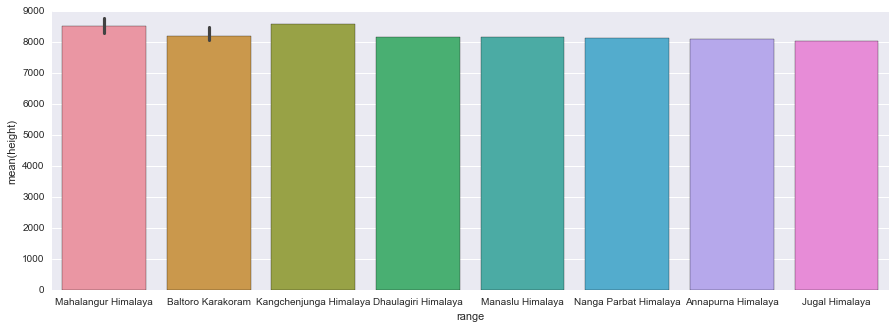

In [150]:

df = mount.sort("height",ascending=False)
plt.figure(figsize=(15,5))

sns.barplot(df[df.height>8000].range,df[df.height>8000].height);

#sns.barplot(mount.range,mount.prominence)


## Box plot of Height :

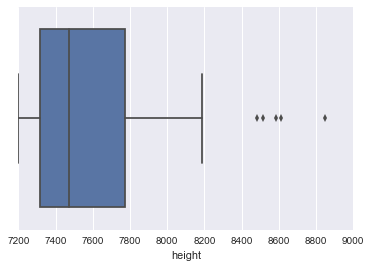

In [151]:
sns.boxplot(mount.height);

## Box plot grouped by  "parent_mountain". But only for the top 5 parent mountain ranges that have maximum number of mountains in them.

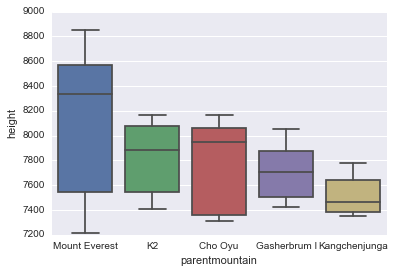

In [152]:
top_5_parent = (mount.groupby("parentmountain").count()["mountain"]).sort_values(ascending=False).head(5).index

top_5_data = mount[mount.parentmountain.isin(top_5_parent)]
sns.boxplot(top_5_data.parentmountain,top_5_data.height);


# EDA/Statistics
## Mean and Standard dev of height column , grouped by location(range)


In [153]:
print("Mean: \n")

print(mount.groupby("range").height.mean())

print("\nStandard deviation: \n")

mount.groupby("range").height.std()



Mean: 

range
Annapurna Himalaya              7651.400000
Assam Himalaya                  7538.000000
Baiku Himalaya                  7281.000000
Baltoro Karakoram               7820.100000
Batura Karakoram                7567.500000
Daxue Shan (Hengduan Shan)      7556.000000
Dhaulagiri Himalaya             7585.142857
Ganesh Himalaya                 7422.000000
Garhwal Himalaya                7479.166667
Hindu Kush                      7488.000000
Hispar Karakoram                7513.900000
Jomolhari Himalaya              7326.000000
Jugal Himalaya                  8027.000000
Kangchenjunga Himalaya          7647.166667
Kongur Shan (Eastern Pamirs)    7589.500000
Kula Kangri Himalaya            7443.000000
Labuche Himalaya                7308.500000
Langtang Himalaya               7356.750000
Lunana Himalaya                 7205.500000
Mahalangur Himalaya             7866.083333
Manaslu Himalaya                7975.666667
Masherbrum Karakoram            7520.000000
Muztagata (Eastern

range
Annapurna Himalaya              356.949296
Assam Himalaya                  345.068109
Baiku Himalaya                         NaN
Baltoro Karakoram               423.736409
Batura Karakoram                177.239010
Daxue Shan (Hengduan Shan)             NaN
Dhaulagiri Himalaya             323.665171
Ganesh Himalaya                        NaN
Garhwal Himalaya                247.675931
Hindu Kush                      158.073822
Hispar Karakoram                251.934934
Jomolhari Himalaya                     NaN
Jugal Himalaya                         NaN
Kangchenjunga Himalaya          478.476924
Kongur Shan (Eastern Pamirs)     84.145707
Kula Kangri Himalaya            192.922264
Labuche Himalaya                 82.731493
Langtang Himalaya               233.769652
Lunana Himalaya                   2.121320
Mahalangur Himalaya             546.823963
Manaslu Himalaya                162.607913
Masherbrum Karakoram            265.539702
Muztagata (Eastern Pamirs)             NaN
Nagar

## Mean and Standard dev of height column , grouped by parent_mountain


In [154]:
print("Mean: \n")

print(mount.groupby("parentmountain").prominence.mean())
print("\nStandard deviation: \n")

print(mount.groupby("parentmountain").prominence.std())


Mean: 

parentmountain
Annapurna              775.000000
Annapurna I           1570.000000
Annapurna III          563.000000
Batura Sar            1931.666667
Cho Oyu               1825.714286
Chogolisa             1581.000000
Churen Himal          1151.000000
Dhaulagiri            3232.750000
Dhaulagiri II          469.000000
Dhaulagiri IV          475.000000
Distaghil Sar         1992.600000
Gangkar Puensum       1958.500000
Gangkhar Puensum      1863.500000
Gasherbrum I          1786.375000
Gasherbrum II          355.000000
Gasherbrum III         715.000000
Ghent Kangri          1000.000000
Ismail Samani Peak    4148.000000
K2                    2054.800000
Kamet                  595.666667
Kangchenjunga         1687.857143
Kanjut Sar            1891.000000
Khunyang Chhish       1799.333333
Kongur Tagh           1787.500000
Kula Kangri            880.000000
Labuche Kang           570.000000
Lhotse                 779.500000
Makalu                 590.000000
Malubiting            180

NaNs imply a single value and hence no standard deviation.

## Mean and Standard deviation of prominence for the whole data.

In [155]:
print("Mean: \n")

print(mount.prominence.mean())
print("\nStandard deviation: \n")

print(mount.prominence.std())


Mean: 

1671.5677966101696

Standard deviation: 

1234.8134187499818


# Statistics or Random Sampling
## compare population and sample statistics

In [156]:
sample_data = mount.sample(40)
print("sample Stats:\n",sample_data.describe().height)
print("\npopulation Stats:\n",df.describe().height)

print("\n \n Difference between population stats and sample stats, Helps us to know how much each value differs :\n \n")
(sample_data.describe() - df.describe()).height

sample Stats:
 count      40.000000
mean     7486.400000
std       266.183068
min      7202.000000
25%      7279.500000
50%      7386.500000
75%      7672.250000
max      8163.000000
Name: height, dtype: float64

population Stats:
 count     118.000000
mean     7578.042373
std       341.471211
min      7200.000000
25%      7316.500000
50%      7472.500000
75%      7775.500000
max      8848.000000
Name: height, dtype: float64

 
 Difference between population stats and sample stats, Helps us to know how much each value differs :
 



count    -78.000000
mean     -91.642373
std      -75.288143
min        2.000000
25%      -37.000000
50%      -86.000000
75%     -103.250000
max     -685.000000
Name: height, dtype: float64

The population and sample statistics are almost the same, they differ by small numbers. This implies that the random sample of 40 that we chose is a good estimation of the population.

## Histogram of year first ascent - sample 

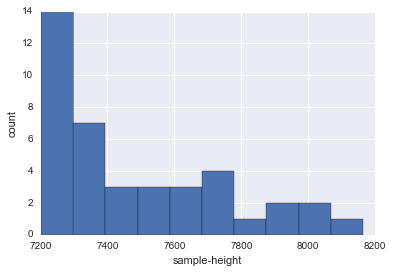

In [157]:
sample_data.height.hist()
plt.xlabel("sample-height")
plt.ylabel("count");

## Histogram of prominence-population

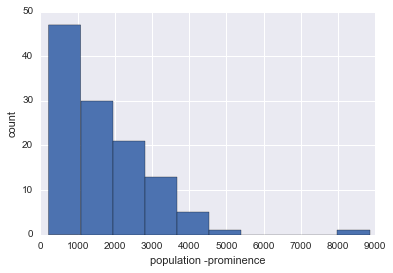

In [158]:
mount.prominence.hist()
plt.xlabel("population -prominence")
plt.ylabel("count");

We  can see that that both the sample and population have a similar distribution. Base on their histogram plots.

# Probability
## If we randomly choose 5 mountains , whats the probability that they all belong to "K2"

In [159]:
a = [list(mount.parentmountain.sample(5).values) for i in range(100)]



28

In [160]:
p = list(mount.parentmountain.values).count("Gasherbrum I")/len(mount.parentmountain)
print("The probability of getting a mountain that belongs to Gasherbrum I : {}/{}".format(list(mount.parentmountain.values).count("Gasherbrum I"),len(mount.parentmountain)))
print("\nThe probability of getting 5 mountains whch belong to Gasherbrum I is :\n 8/118 * 7/117 * 6/116 * 5/115 * 4/114  = ",p**5)

The probability of getting a mountain that belongs to Gasherbrum I : 8/118

The probability of getting 5 mountains whch belong to Gasherbrum I is :
 8/118 * 7/117 * 6/116 * 5/115 * 4/114  =  1.4323194797439665e-06


In [161]:
p = list(mount.parentmountain.values).count("Mount Everest")/len(mount.parentmountain)
print("The probability of getting a mountain that belongs to Mount Everest : {}/{}".format(list(mount.parentmountain.values).count("Mount Everest"),len(mount.parentmountain)))
print("\nThe probability of getting 5 mountains whch belong to Mount Everest is :\n 8/118 * 7/117 * 6/116 * 5/115 * 4/114  = ",p**5)

The probability of getting a mountain that belongs to Mount Everest : 10/118

The probability of getting 5 mountains whch belong to Mount Everest is :
 8/118 * 7/117 * 6/116 * 5/115 * 4/114  =  4.371092162304584e-06


# Random variable and its distribution

Random variable  : Height of the mountains

Random variable Type: Discrete

Probability distribution : Discrete probability distribution


As the height values are not 0 or 1, Its not bernouli or binomial.


## Fitting Poisson: 

In [162]:
import scipy.stats as sats

import fit

x = arange(7000,9000)

# Checking if distribution fits Poisson distribution

# getting optimal lambda
# funtions used from fit.py

optimal_lambda = fit.fit_poisson(height)
optimal_poisson = stats.poisson(optimal_lambda)
optimal_poisson_y = optimal_poisson.pmf(x)
optimal_lambda

200.27053003903018

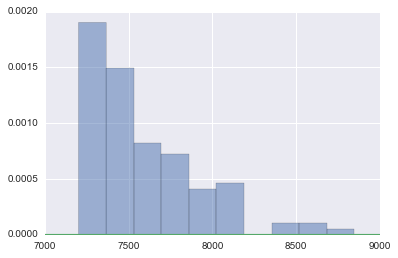

In [163]:

hist(height, bins = 10, alpha = 0.5, normed = True);
plot(x, optimal_poisson_y);

## Poisson is not fitting as we can see that the green line is at 0.

-------------------

## Fitting an exponential distribution . Though the height is a discrete variable, I did not do any continuity correction before using this. But it perfectly fits the data.

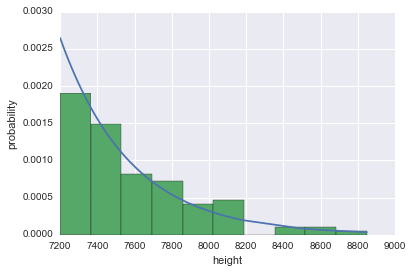

In [164]:
import scipy.stats as stats
import matplotlib.pyplot as plt
height = mount.height
loc,scale=stats.expon.fit(height)
s = [stats.expon.pdf(i,loc,scale) for i in height]
plt.plot(height,s)
plt.hist(height,normed=True)
plt.xlabel("height")
plt.ylabel("probability")

The height seems to follow an exponential distribution. 

##  Make Statistical Inference from Sample to Population

## Assuing that the population is unknown , I looked up the average mountain height globally and I'm trying to reject the claim that the average heigth is 4000m, Using the data that I have.

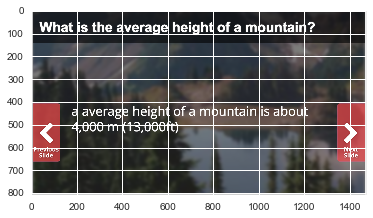

In [165]:
import matplotlib.image as mpimg
img=mpimg.imread('pic.png')
plt.imshow(img);

Ho: Null hypotesis is that the averae height of mountains is 4000m 

Ha: Alternate hypothesis is that the average height is greater than 4000m


I'm taking the low ranked 37 mountain heights average to disprove the null hypothesis.

The sample size I'm taking is greatr than 30. So I'm using z statistics to do the hypothesis testing.



In [166]:
sample= mount.ix[80:117]
stats.norm.sf(sample.height.mean(),4000,sample.height.std()/np.sqrt(len(sample)))

0.0

The p-value is so low that we reject the null hypothesis. 
Average mountain height is greater than 4000m.


This is what I expected , because the data I have is of highest mountains data. Even when i considered the lowest ranked mountains, I am able to say that the average mountain height is greater than 4000m. 

Though this is obvious, I wanted to do this test.

## Hypthesis testing 2:

## Considering the data we have to be the population data. Generating a random sample of 40 and doing a hhypothesis testing on the prominence:


sample = mount.sample(40)

sample.prominence.mean() 

sample mean is 1502

In [168]:
print("Ho : prominence is {}".format(mount.prominence.mean()))
print("\nHa : prominence is not {}".format(mount.prominence.mean()))


Ho : prominence is 1671.5677966101696

Ha : prominence is not 1671.5677966101696


The sample size is 40, which is greater than 30. and, we have the population standard deviation as we considered our data to be the population. so we use z stats to do the hypothesis test.

In [169]:
import scipy.stats as stats

z=(sample.prominence.mean()-mount.prominence.mean())/(mount.prominence.std()/np.sqrt(len(sample)))
stats.norm.cdf(z,0,1)*2

0.0091117070219349106

The p-value is greater than 0.05 , so we fail to reject the null hypothesis.

Average prominence is not 1671.56

## Linear regression:

## Trying to predict the numbe of attempts that are made based on the height, prominence and rank of the the mountains.

In [170]:
linear = mount
linear["try_ascent"]= mount.ascentsbef2004+mount.failedattemptsbef2004
linear.corr()

,rank,height,height(ft),prominence,firstascent,ascentsbef2004,failedattemptsbef2004,try_ascent
rank,1.000000,-0.800126,-0.800115,-0.568135,-0.122825,-0.498830,-0.502409,-0.515305
height,-0.800126,1.000000,1.000000,0.547900,0.132501,0.708739,0.733547,0.741304
height(ft),-0.800115,1.000000,1.000000,0.547860,0.132505,0.708750,0.733547,0.741310
prominence,-0.568135,0.547900,0.547860,1.000000,0.005493,0.627629,0.645480,0.654555
firstascent,-0.122825,0.132501,0.132505,0.005493,1.000000,0.086120,0.070020,0.081202
ascentsbef2004,-0.498830,0.708739,0.708750,0.627629,0.086120,1.000000,0.885206,0.976392
failedattemptsbef2004,-0.502409,0.733547,0.733547,0.645480,0.070020,0.885206,1.000000,0.964794
try_ascent,-0.515305,0.741304,0.741310,0.654555,0.081202,0.976392,0.964794,1.000000


> The target variable(try_ascent) is the number of tries made to climb a mountain. This is a variable I created by adding the successful and failed attempts to climb a mountin. So we donot consider these 2 variables into our prediction. As they are highly correlated. 

In [187]:


x= linear[["rank","height","prominence"]]
y = linear.try_ascent
x = sm.add_constant(x)

model = sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             try_ascent   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     51.52
Date:                Thu, 20 Oct 2016   Prob (F-statistic):           4.61e-21
Time:                        12:29:26   Log-Likelihood:                -490.35
No. Observations:                 117   AIC:                             988.7
Df Residuals:                     113   BIC:                             999.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -471.4703     63.762     -7.394      0.000    -597.795    -345.146
rank           0.1559      0.082      1.904      0.059      -0.006       0.318
height         0.0621      0.008      7.861      0.000       0.046       0.078
prominence     0.0052      0.002      2.919      0.004       0.002       0.009
==============================================================================
Omnibus:                       24.636   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.230
Skew:                           0.948   Prob(JB):                     1.11e-09
Kurtosis:                       5.206   Cond. No.                     3.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

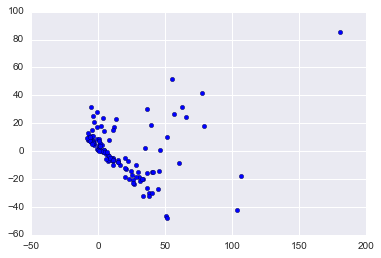

In [172]:
scatter(results.fittedvalues,results.resid);

There is a pattern in the residual plot. So, residuals and predicted values are linearly dependent. We are trying to fit a linear model to a fairly non-linear model.

In [173]:
from statsmodels.stats.diagnostic import het_breushpagan

het_breushpagan(results.resid, results.model.exog)[1] # the second output gives the p-value of the test

9.3637801266908532e-15

Using the het_breushpagan test:

Ho: Ther is a constant varience. 

Ha : The variance is non constant.

P-value is very less. so we reject the null hypothesis. 
Hence, the assumption of Variance not being constant is met. 

## Normality using the JB test:



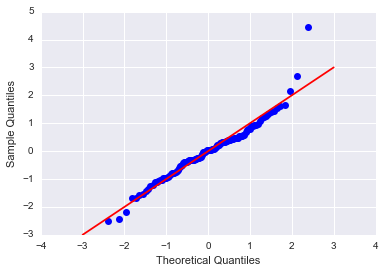

In [174]:
from statsmodels.graphics.gofplots import qqplot

# There are various ways of standardizing the residuals 
# We will use the pearson residuals as the standardized residuals here
sres1 = results.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

>Based on Jarque-Bera (JB) test. The p value is 5.07e-12. 
>So we reject the null hypothesis which states that the residuals follow a normal distribution.

>Hence we accept the assumption that the residuals are not normally distributed.

## Residual vs Leverage plot

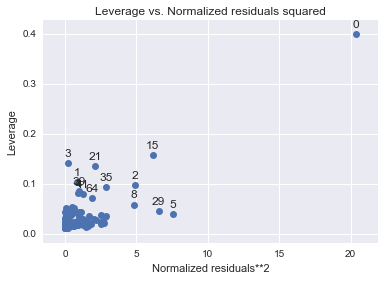

In [175]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(results);

The point 0 has both high leverage and high residual.
WE can remove that point and run the model again

In [176]:
linear = linear.ix[1:118]

In [177]:

x= linear[["rank","height","prominence"]]
y = linear.try_ascent
x = sm.add_constant(x)

model = sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             try_ascent   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     51.52
Date:                Thu, 20 Oct 2016   Prob (F-statistic):           4.61e-21
Time:                        12:11:04   Log-Likelihood:                -490.35
No. Observations:                 117   AIC:                             988.7
Df Residuals:                     113   BIC:                             999.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -471.4703     63.762     -7.394      0.000    -597.795    -345.146
rank           0.1559      0.082      1.904      0.059      -0.006       0.318
height         0.0621      0.008      7.861      0.000       0.046       0.078
prominence     0.0052      0.002      2.919      0.004       0.002       0.009
==============================================================================
Omnibus:                       24.636   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.230
Skew:                           0.948   Prob(JB):                     1.11e-09
Kurtosis:                       5.206   Cond. No.                     3.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Time series:


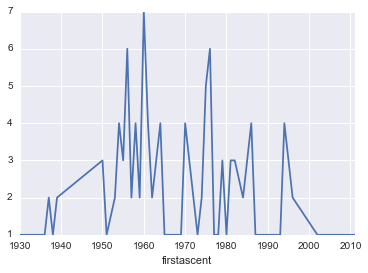

In [178]:
yearly = mount.groupby("firstascent").count().mountain
yearly = yearly.drop(0,axis=0)

yearly.plot();

Most of the first ascents were made in the year 1960. Ther was a dip around 1990 and there were no ascents for a few years. Over all we can see that almost all the first ascents were made between 1935 to 2000

## Auto correlation plot.

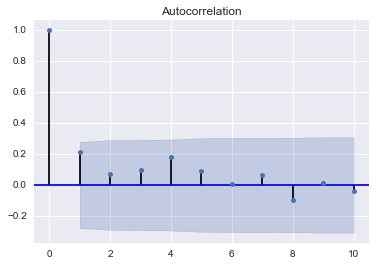

In [179]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(yearly, lags=10);

None of the lags are as important for predicting the number of ascents that will be made in the coming year.

## Partial autocorrelation 

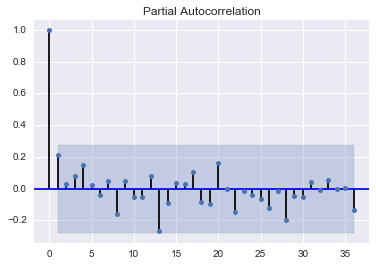

In [180]:
plot_pacf(yearly, lags=36);

None of the cumuliative lags are as important for predicting the number of ascents that will be made in the coming year.

## Logistic regression.

## Converting the column "Range" to binary, replacing every mountain range that belongs to Himalayas as 1 and all the mountain ranges that donot belong to Himlayas to be 0.

In [181]:
log = linear
ex = linear["range"].map(lambda x: 1 if x.split(" ")[1] == 'Himalaya' else 0)
log["range"]=ex


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [182]:
log

,rank,mountain,height,height(ft),prominence,range,coordinates,parentmountain,firstascent,ascentsbef2004,failedattemptsbef2004,try_ascent
1,2,K2 / Qogir / Godwin Austen,8611,28251,4017,0,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44.0,89.0
2,3,Kangchenjunga,8586,28169,3922,1,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24.0,62.0
3,4,Lhotse,8516,27940,610,1,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26.0,52.0
4,5,Makalu,8485,27838,2386,1,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52.0,97.0
5,6,Cho Oyu,8188,26864,2340,1,28°05′39″N 86°39′39″E﻿,Mount Everest,1954,79,28.0,107.0
6,7,Dhaulagiri I,8167,26795,3357,1,28°41′48″N 83°29′35″E﻿,K2,1960,51,39.0,90.0
7,8,Manaslu,8163,26781,3092,1,28°33′00″N 84°33′35″E﻿,Cho Oyu,1956,49,45.0,94.0
8,9,Nanga Parbat,8126,26660,4608,0,35°14′14″N 74°35′21″E﻿,Dhaulagiri,1953,52,67.0,119.0
9,10,Annapurna I,8091,26545,2984,1,28°35′44″N 83°49′13″E﻿,Cho Oyu,1950,36,47.0,83.0
10,11,Gasherbrum I / Hidden Peak / K5,8080,26509,2155,0,35°43′28″N 76°41′47″E﻿,K2,1958,31,16.0,47.0


In [183]:
x=log[["try_ascent","rank"]]
y= log.range
x=sm.add_constant(x)

model = sm.Logit(y,x)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.638065
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  range   No. Observations:                  117
Model:                          Logit   Df Residuals:                      114
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Oct 2016   Pseudo R-squ.:                 0.07552
Time:                        12:11:05   Log-Likelihood:                -74.654
converged:                       True   LL-Null:                       -80.752
                                        LLR p-value:                  0.002247
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9117      0.596     -3.208      0.001      -3.080      -0.744
try_ascent     0.0320      0.011      2.961      0.003       0.011       0.053
rank           0.0205      0.007      2.813      0.005       0.006       0.035
==============================================================================
"""

## Logistic regression using GLM : 

In [184]:
from statsmodels.genmod.families import family
import statsmodels.formula.api as smf
smf.logit('range ~ try_ascent+rank', data = log).fit().summary()

Optimization terminated successfully.
         Current function value: 0.638065
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  range   No. Observations:                  117
Model:                          Logit   Df Residuals:                      114
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Oct 2016   Pseudo R-squ.:                 0.07552
Time:                        12:11:05   Log-Likelihood:                -74.654
converged:                       True   LL-Null:                       -80.752
                                        LLR p-value:                  0.002247
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9117      0.596     -3.208      0.001      -3.080      -0.744
try_ascent     0.0320      0.011      2.961      0.003       0.011       0.053
rank           0.0205      0.007      2.813      0.005       0.006       0.035
==============================================================================
"""

## Using both GLM and Logit we get the same output, each of the predictor is significant as their pvalues are less. But the pseudo -Rsquare is too less. Which makes this model not that trust worthy.